In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plots and graphs

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digital-currency-time-series/dc.csv


In [2]:
df = pd.read_csv('/kaggle/input/digital-currency-time-series/dc.csv')

df = df.rename(columns = {'Unnamed: 0' : 'Time'})
df['Time'] = pd.to_datetime(df['Time'])
df = df.iloc[::-1].set_index('Time')

# lets check out dataset
df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Time,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


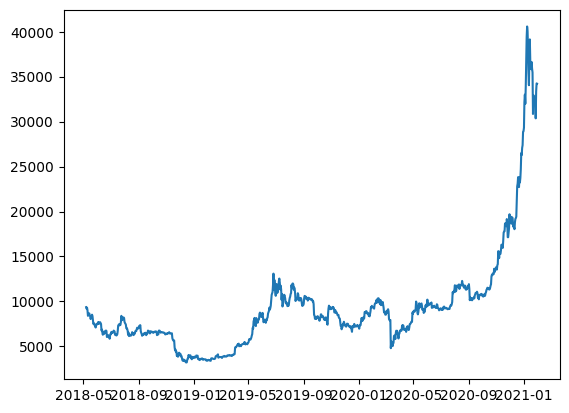

In [3]:
# simple plot
plt.plot(df['close_USD'])
plt.show()

In [4]:
# Split the data

# not in random chunks, becouse it is a series data
# calc by close_USD
train = df.iloc[:-200].close_USD
test = df.iloc[-200:].close_USD

In [5]:
# !pip install "numpy>=1.16.5,<1.23.0"
from statsmodels.tsa.arima.model import ARIMA


#sample parameters
model = ARIMA(train, order=(2, 1, 0)) 
results = model.fit()

# Make predictions for the test set
forecast = results.forecast(steps=200)
forecast

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2020-07-15    9252.006931
2020-07-16    9252.942627
2020-07-17    9252.688291
2020-07-18    9252.752780
2020-07-19    9252.735700
                 ...     
2021-01-26    9252.739185
2021-01-27    9252.739185
2021-01-28    9252.739185
2021-01-29    9252.739185
2021-01-30    9252.739185
Freq: D, Name: predicted_mean, Length: 200, dtype: float64

In [6]:
#  check the forecast
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#mean absolute error
mae = mean_absolute_error(test, forecast)

#root mean square error
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

#mean absolute percentage error
mape = (forecast - test).abs().div(test).mean()

print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Square Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

MAE (Mean Absolute Error): 7956.23
RMSE (Root Mean Square Error): 11705.11
MAPE (Mean Absolute Percentage Error): 0.35%


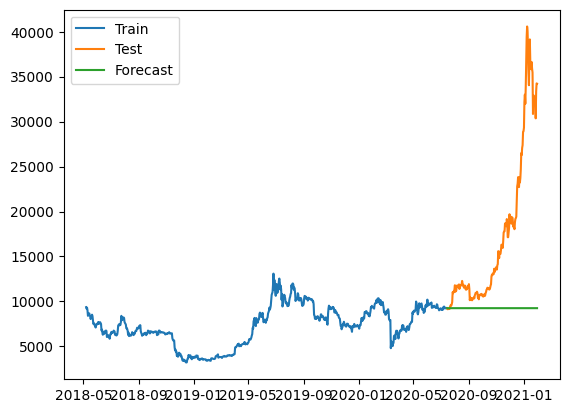

In [7]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

bruh

прямая линия вместо нормальных значений

In [8]:
!pip install prophet

In [9]:
df_p = df.reset_index()[["Time", "close_USD"]].rename(
    columns={"Time": "ds", "close_USD": "y"}
)

In [10]:
# try using Prophet model
import pandas as pd
from prophet import Prophet

model = Prophet()

# Fit the model
model.fit(df_p)

# create date to predict
future_dates = model.make_future_dataframe(periods=365)

# Make predictions
predictions = model.predict(future_dates)

predictions.head()

14:42:28 - cmdstanpy - INFO - Chain [1] start processing
14:42:29 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-07,2800.153016,5939.024366,8590.252039,2800.153016,2800.153016,4512.145671,4512.145671,4512.145671,9.112191,9.112191,9.112191,4503.033480,4503.033480,4503.033480,0.0,0.0,0.0,7312.298686
1,2018-05-08,2822.631830,6002.029478,8699.858333,2822.631830,2822.631830,4550.727182,4550.727182,4550.727182,-18.290080,-18.290080,-18.290080,4569.017262,4569.017262,4569.017262,0.0,0.0,0.0,7373.359012
2,2018-05-09,2845.110645,6109.503250,8828.228517,2845.110645,2845.110645,4653.630066,4653.630066,4653.630066,24.520239,24.520239,24.520239,4629.109828,4629.109828,4629.109828,0.0,0.0,0.0,7498.740711
3,2018-05-10,2867.589459,6231.043658,8827.761526,2867.589459,2867.589459,4671.407800,4671.407800,4671.407800,-10.978868,-10.978868,-10.978868,4682.386667,4682.386667,4682.386667,0.0,0.0,0.0,7538.997259
4,2018-05-11,2890.068273,6232.388085,8933.318314,2890.068273,2890.068273,4733.467082,4733.467082,4733.467082,5.431493,5.431493,5.431493,4728.035589,4728.035589,4728.035589,0.0,0.0,0.0,7623.535355


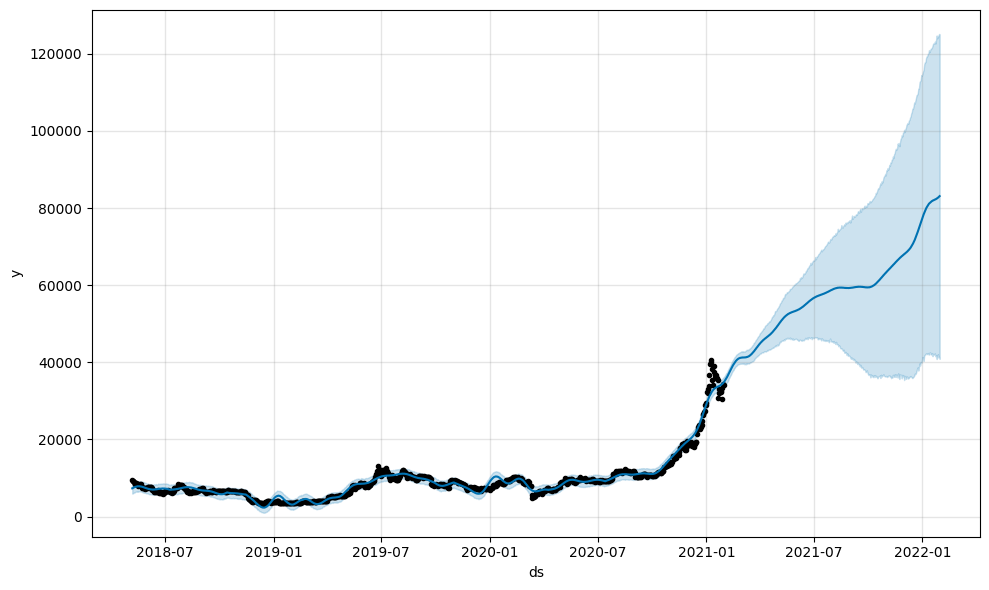

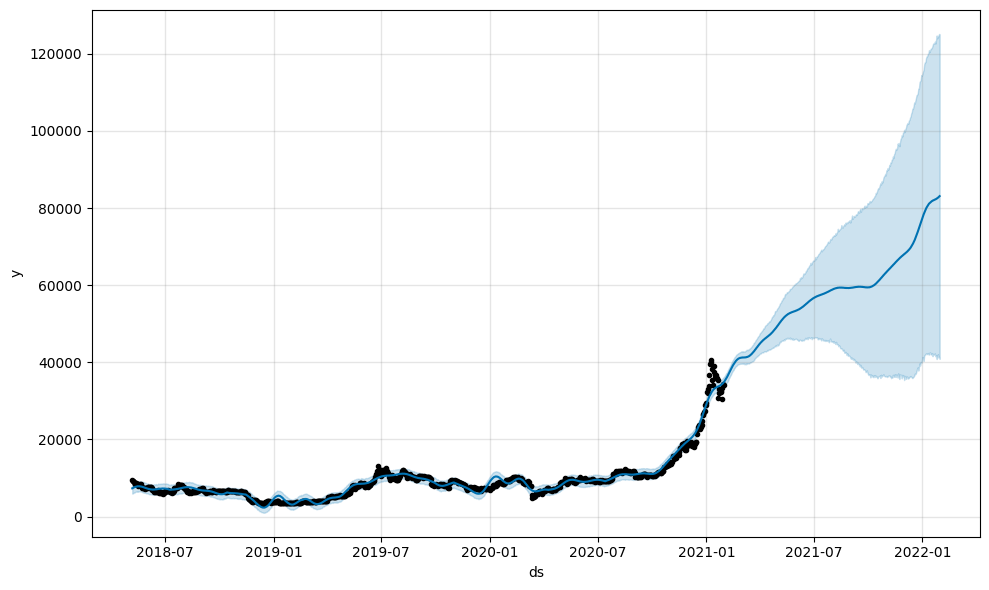

In [11]:
model.plot(predictions)

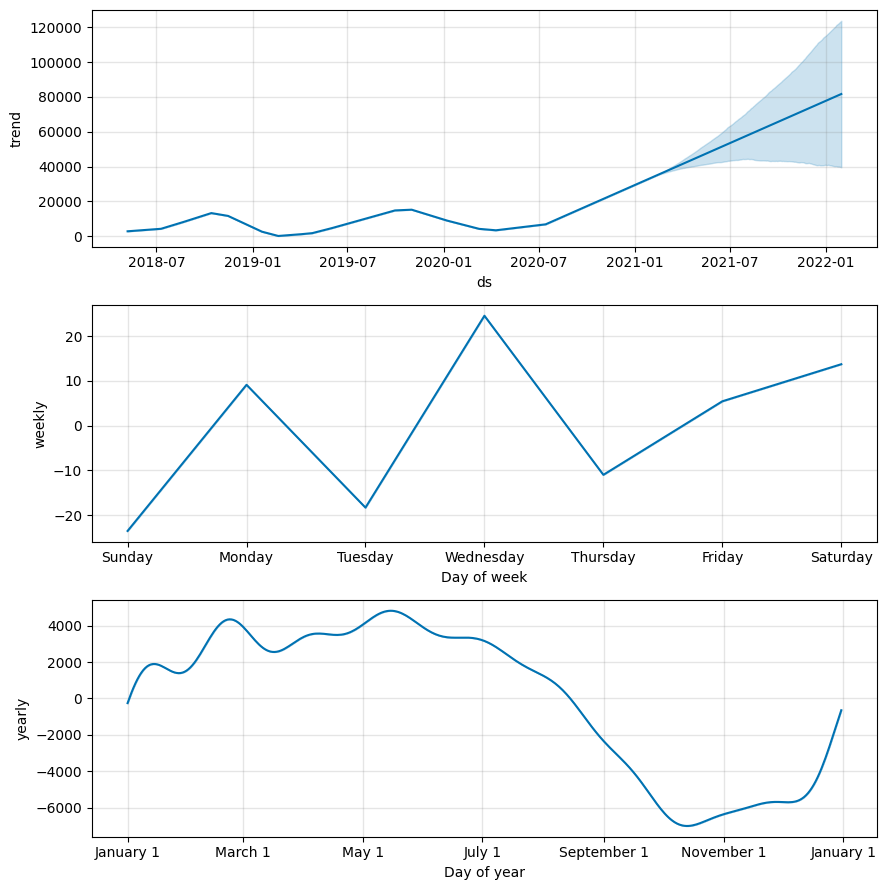

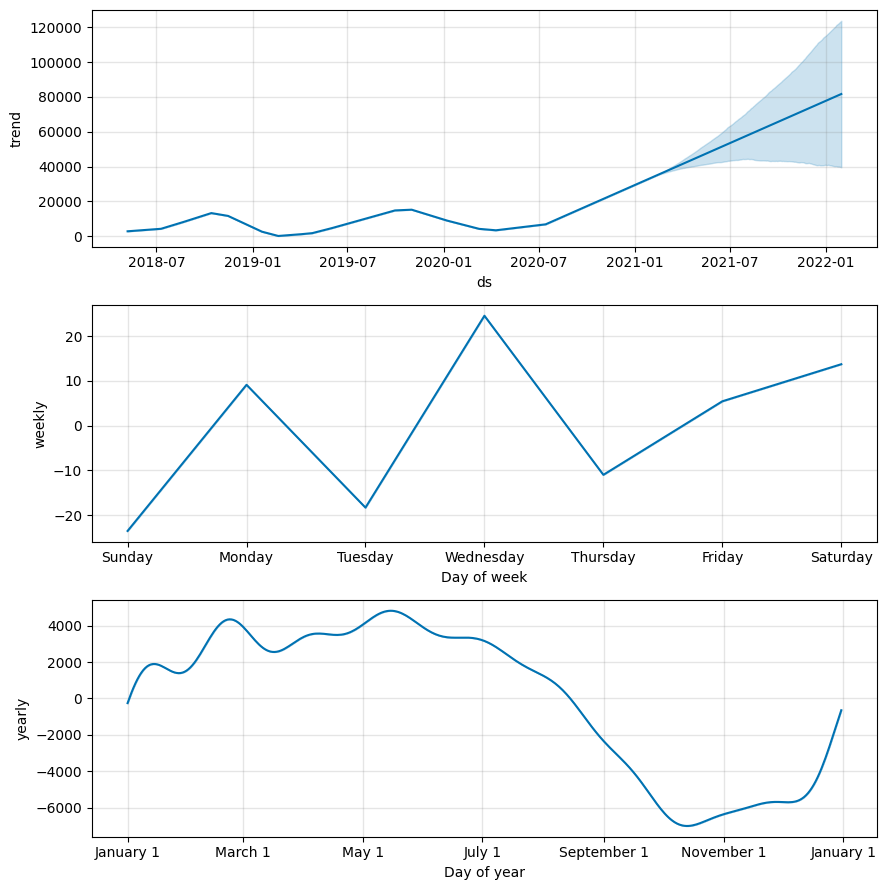

In [12]:
model.plot_components(predictions)

In [13]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation with initial 365 days for the first training data and the cut-off for every 180 days.

df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '365 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res

  0%|          | 0/2 [00:00<?, ?it/s]

14:42:32 - cmdstanpy - INFO - Chain [1] start processing
14:42:32 - cmdstanpy - INFO - Chain [1] done processing
14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,7.946511e+05,891.432061,718.133052,0.071873,0.074977,0.074549,0.452055
1,38 days,7.983212e+05,893.488245,714.200942,0.072166,0.068787,0.074471,0.465753
2,39 days,7.994553e+05,894.122645,708.692347,0.072345,0.068591,0.074273,0.479452
3,40 days,7.888646e+05,888.180504,698.183927,0.072098,0.067562,0.073630,0.493151
4,41 days,1.028874e+06,1014.334492,727.310096,0.082067,0.064918,0.079191,0.506849
...,...,...,...,...,...,...,...,...
324,361 days,1.271991e+08,11278.255842,9646.676458,0.476000,0.502805,0.484611,0.561644
325,362 days,1.284654e+08,11334.258424,9705.566132,0.474622,0.496574,0.484984,0.547945
326,363 days,1.307617e+08,11435.108683,9794.653294,0.472964,0.496574,0.485742,0.534247
327,364 days,1.334472e+08,11551.933665,9902.464559,0.472128,0.491476,0.487392,0.520548


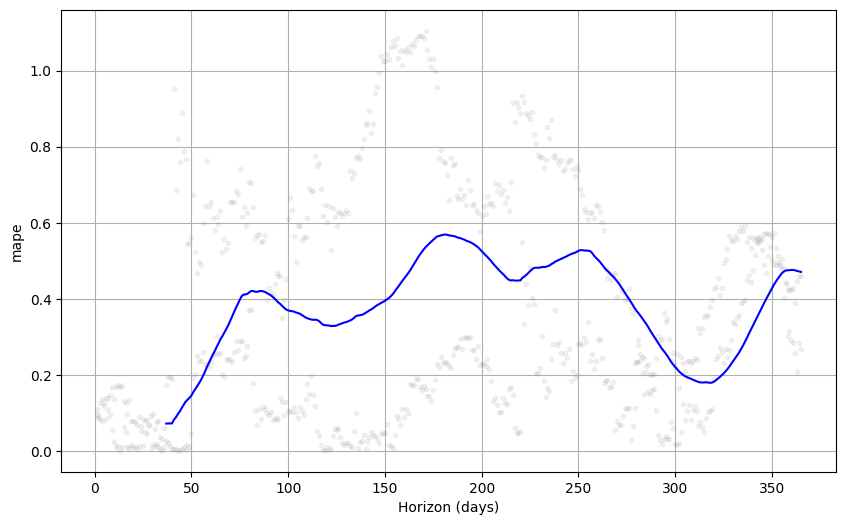

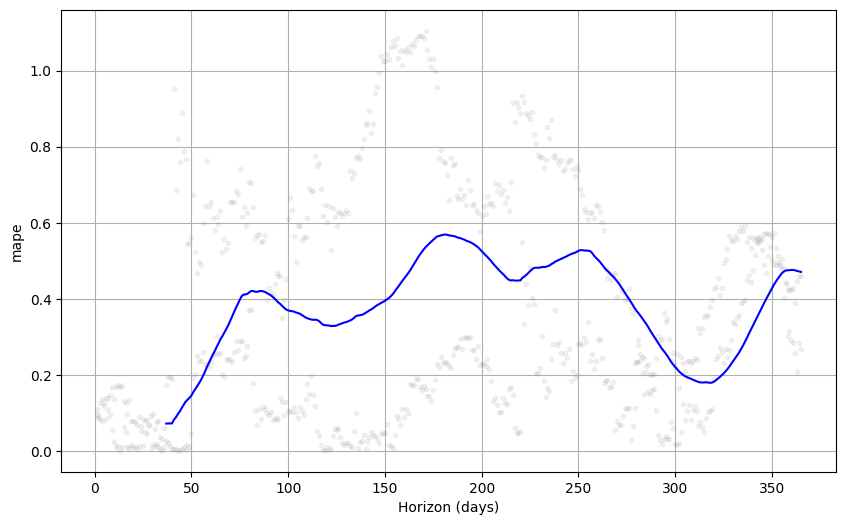

In [14]:
from prophet.plot import plot_cross_validation_metric
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'

plot_cross_validation_metric(df_cv, metric= 'mape')